In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

population_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv', skiprows=4)
country_metadata = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv')

population_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [5]:
population_2023 = population_data[['Country Name', 'Country Code', '2023']]
merged_data = population_2023.merge(country_metadata[['Country Code', 'Region', 'IncomeGroup']],on='Country Code', how='left')

merged_data = merged_data.dropna(subset=['2023'])
merged_data['2023'] = pd.to_numeric(merged_data['2023'], errors='coerce')
merged_data = merged_data.dropna(subset=['2023'])

merged_data.head()


,Country Name,Country Code,2023,Region,IncomeGroup
0,Aruba,ABW,106277.0,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,739108306.0,NaN,NaN
2,Afghanistan,AFG,42239854.0,South Asia,Low income
3,Africa Western and Central,AFW,502789511.0,NaN,NaN
4,Angola,AGO,36684202.0,Sub-Saharan Africa,Lower middle income


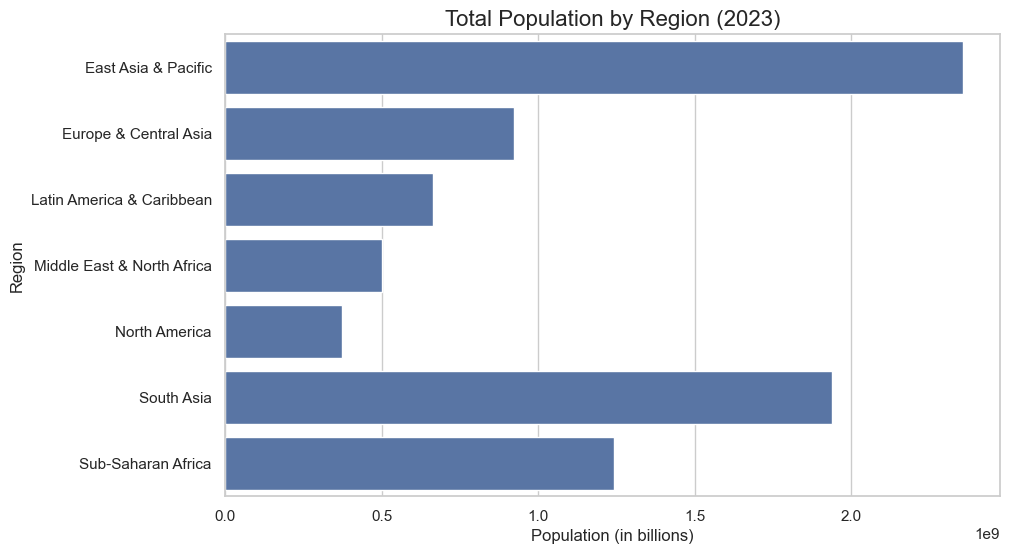

In [7]:
population_by_region = merged_data.groupby('Region')['2023'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='2023', y='Region', data=population_by_region)
plt.title('Total Population by Region (2023)', fontsize=16)
plt.xlabel('Population (in billions)', fontsize=12)
plt.ylabel('Region', fontsize=12)

plt.show()


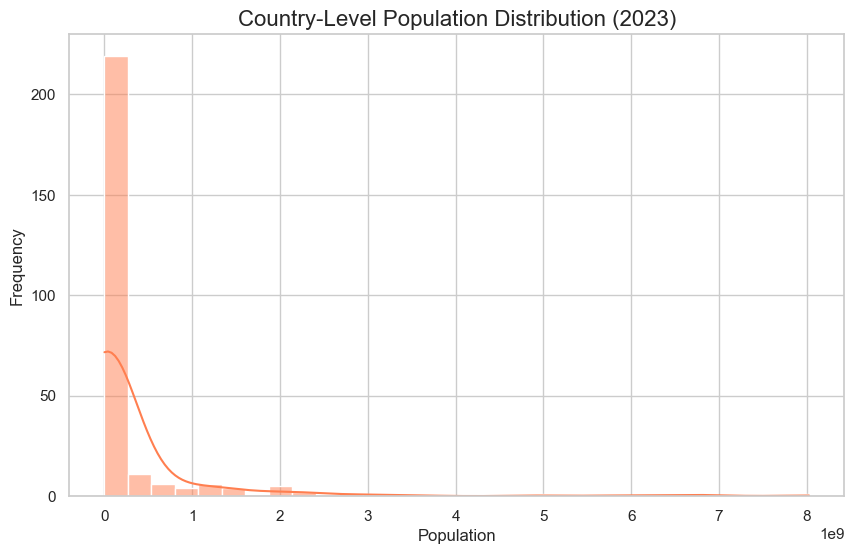

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['2023'], bins=30, kde=True, color='coral')

plt.title('Country-Level Population Distribution (2023)', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()
